In [15]:
import os
from collections import Counter
import matplotlib.pyplot as plt

In [16]:


# Path to the folder containing txt files
folder_path = "data/desktop_assembly/groundTruth"

# Initialize a counter for the classes
class_counter = Counter()

# Iterate over all txt files in the folder
for filename in os.listdir(folder_path):
    # if filename.endswith(".txt"):
    with open(os.path.join(folder_path, filename), "r") as file:
        # Read lines and update the counter
        skills = file.read().splitlines()
        class_counter.update(skills)

# Extract class names and their counts
classes, counts = zip(*class_counter.items())



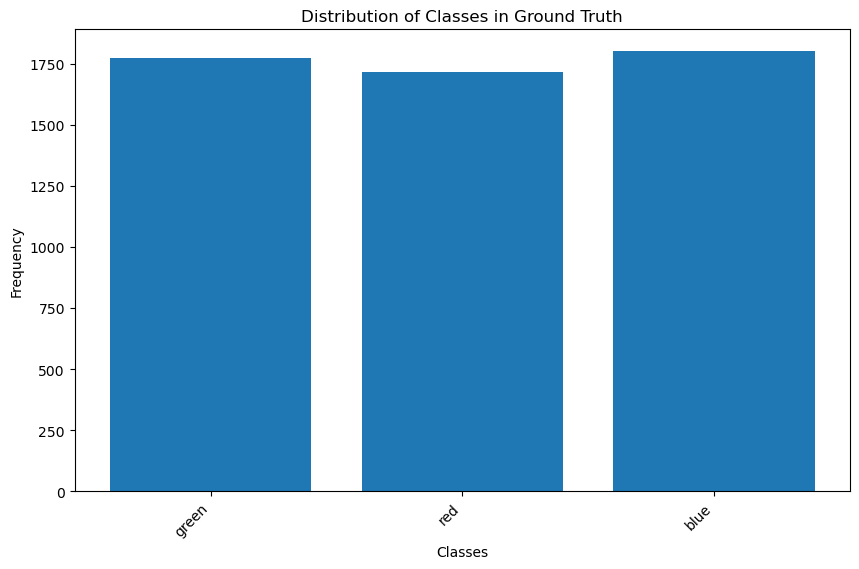

In [17]:
# Plotting the class distribution as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(classes, counts)
plt.xlabel("Classes")
plt.ylabel("Frequency")
plt.title("Distribution of Classes in Ground Truth")
plt.xticks(rotation=45, ha="right")
plt.show()

In [18]:
import pandas as pd 
import numpy as np

In [19]:
dat_path = 'data/desktop_assembly/features'

all_arrays = []
for i in range(100):
    all_arrays.append(np.load(f'{dat_path}/{i}_colours.npy'))

In [20]:
all_arrays = np.array(all_arrays)

In [21]:
all_arrays.shape

(100, 12, 11)

In [22]:
full_data = all_arrays.reshape(-1, 11)

In [23]:
full_data.shape

(1200, 11)

In [24]:
#Run PCA on the data
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
pca.fit(full_data)

PCA(n_components=0.95)

In [25]:
print(f"Number of components selected (state-level PCA): {pca.n_components_}")

Number of components selected (state-level PCA): 8


In [26]:
pca_transformed_data = np.array([
    pca.transform(trajectory)  # (12, n_components)
    for trajectory in all_arrays  # Iterate over 100 episodes
])

In [27]:
pca_transformed_data.shape

(100, 12, 8)

In [29]:
pca_transformed_data[0].shape

(12, 8)

In [30]:
all_arrays[0].shape

(12, 11)

In [31]:
for i, pc in enumerate(pca_transformed_data):
    np.save('data/desktop_assembly_pca/features/' + str(i) + '_colours.npy', pc)

In [32]:
all_arrays[0]

array([[ 1.,  0., -3.,  0.,  0.,  1.,  0.,  0.,  1., -3.,  0.],
       [ 0.,  0., -4.,  0.,  0.,  0.,  0.,  1.,  0., -3.,  0.],
       [ 1.,  0., -3.,  0.,  0.,  0.,  0.,  1.,  1., -3.,  0.],
       [ 2.,  0., -2.,  0.,  0.,  0.,  0.,  1.,  2., -3.,  0.],
       [ 3.,  0., -1.,  0.,  0.,  0.,  0.,  1.,  3., -3.,  0.],
       [ 4.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  4., -3.,  0.],
       [ 3.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  3., -3.,  0.],
       [ 2.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  2., -3.,  0.],
       [ 1.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  1., -3.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0., -3.,  0.],
       [ 0.,  1.,  0.,  0.,  1.,  0.,  0.,  1.,  0., -2.,  0.],
       [ 0.,  2.,  0.,  0.,  1.,  0.,  0.,  1.,  0., -1.,  0.]])

In [33]:
pca_transformed_data[0]

array([[-2.52440466, -1.34475372, -3.28056955,  0.37682592,  0.85411675,
        -2.32374244, -0.97062727, -0.56075458],
       [-2.99203001, -3.22772154, -2.87075341,  0.39476882,  0.74479506,
        -2.23014913, -0.9132807 , -0.68677165],
       [-2.57407616, -1.7763689 , -3.06497583,  0.79432815,  1.25528254,
        -1.83671266, -0.62980883, -0.53024686],
       [-2.15612231, -0.32501626, -3.25919824,  1.19388747,  1.76577002,
        -1.44327618, -0.34633697, -0.37372206],
       [-1.73816846,  1.12633638, -3.45342065,  1.5934468 ,  2.2762575 ,
        -1.04983971, -0.06286511, -0.21719726],
       [-1.32155284,  2.5841196 , -3.6380156 ,  2.01708402,  2.80774406,
        -0.71777182,  0.1872832 , -0.19031741],
       [-1.65183959,  1.72073033, -3.2074056 ,  1.90288553,  2.06896598,
        -0.49250991, -0.28968259, -0.53250178],
       [-1.98212635,  0.85734106, -2.7767956 ,  1.78868704,  1.33018791,
        -0.26724801, -0.76664837, -0.87468615],
       [-2.3124131 , -0.00604821